<a href="https://colab.research.google.com/github/NiyazovIlia/-Python-Data-Science-2/blob/lesson-3/GB_DS_2_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Подключение бибилиотек и данных

In [1]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'
SUBMIT_PATH = 'sample_submission.csv'

# 2.Загрузка данных в Data Frame

## Описание файлов
1. train.csv - тренировочные данные
2. test.csv - тестовые данные
3. sampleSubmission.csv - образец файла для отправки в правильном формате

## Описание признаков данных
Home Ownership - домовладение

Annual Income - годовой доход

Years in current job - количество лет на текущем месте работы

Tax Liens - налоговые обременения

Number of Open Accounts - количество открытых счетов

Years of Credit History - количество лет кредитной истории

Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)

Number of Credit Problems - количество проблем с кредитом

Months since last delinquent - количество месяцев с последней просрочки платежа

Bankruptcies - банкротства

Purpose - цель кредита

Term - срок кредита

Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)

Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)

Monthly Debt - ежемесячный долг

Credit Score - баллы кредитного рейтинга

Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
# Импортируем данные train.csv в pandas Dataframe
df_train = pd.read_csv(TRAIN_PATH, sep=',')
df_test = pd.read_csv(TEST_PATH, sep=',')
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# 3.EDA

## Основная информация о Data Frame

In [4]:
# Посмотрим основную информацию по все признакам
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
# Посмотрим основные статистики
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## Исследование признаков

In [6]:
for i in df_train:
  print('\nКоличество уникальных значений признака ' + i + '\n')
  print(df_train[i].value_counts())


Количество уникальных значений признака Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

Количество уникальных значений признака Annual Income

1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64

Количество уникальных значений признака Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Количество уникальных значений признака Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

Количество уникальных значений признака Number of Open Accounts

9.0  

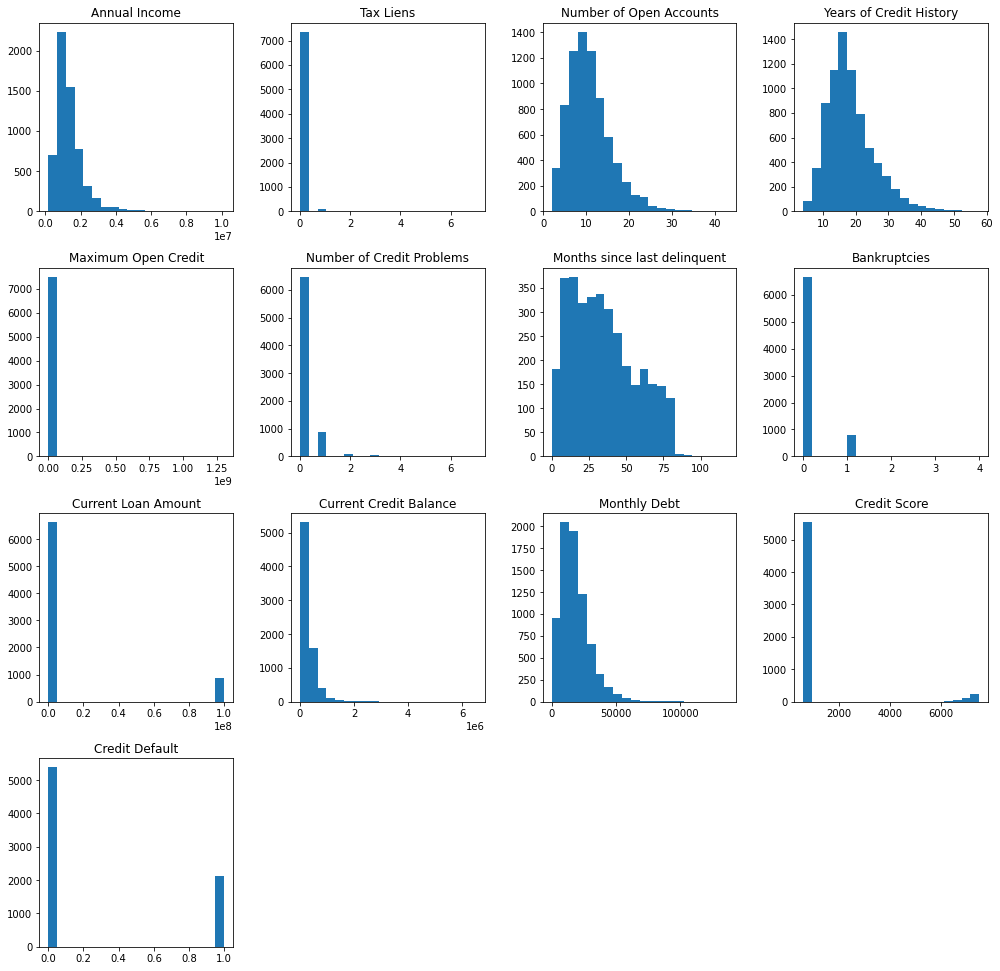

In [7]:
df_train.hist(figsize=(17,17), bins=20, grid=False)
plt.show()

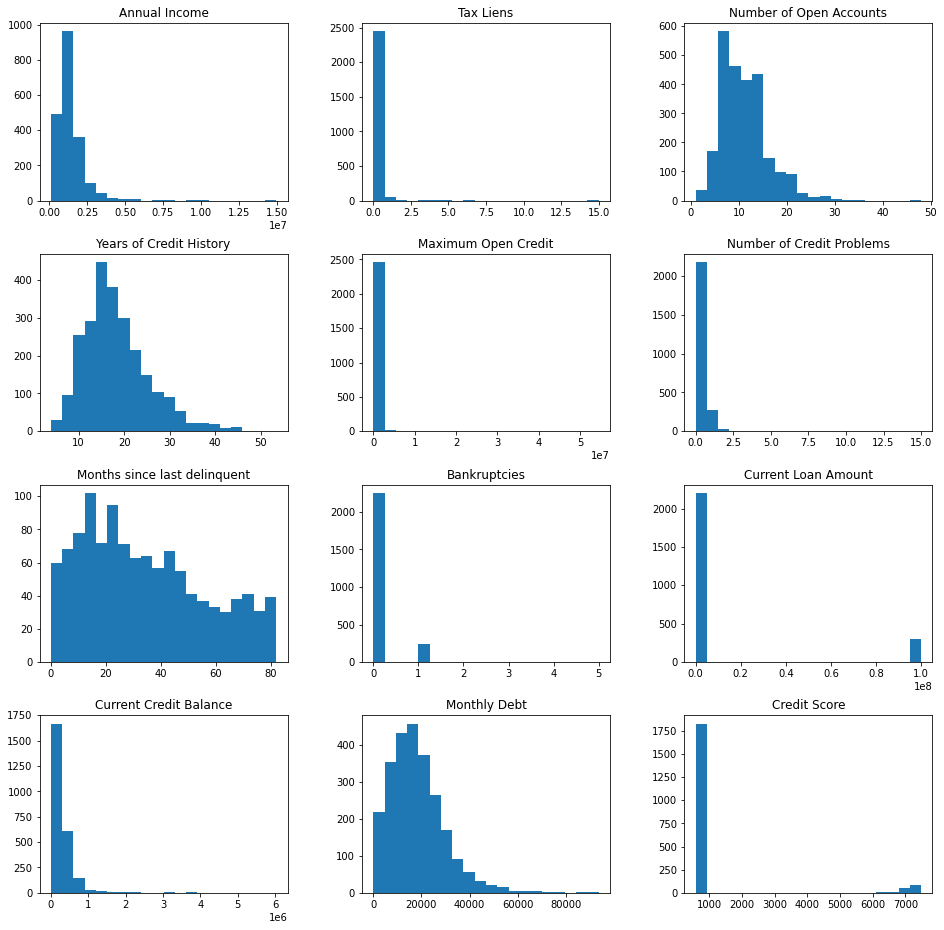

In [8]:
df_test.hist(figsize=(16,16), bins=20, grid=False)
plt.show()

**Если сравнить тестовые и тренировочные данные то видно, что: Number of Open Accounts, Number of credit problems, Months sinse last delinquent и Monthly Debt отличаются.**

## Исследование целевой переменной

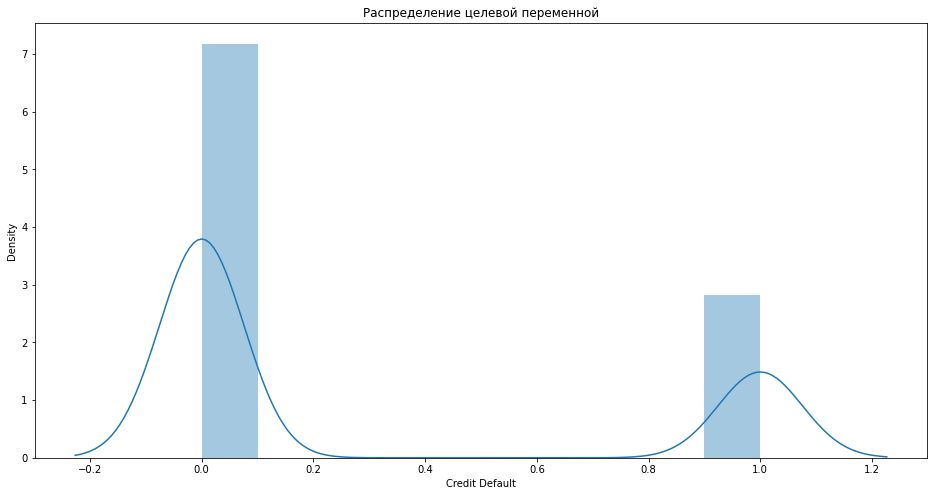

In [9]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['Credit Default'])

plt.title('Распределение целевой переменной')
plt.show()

## Матрица корреляций

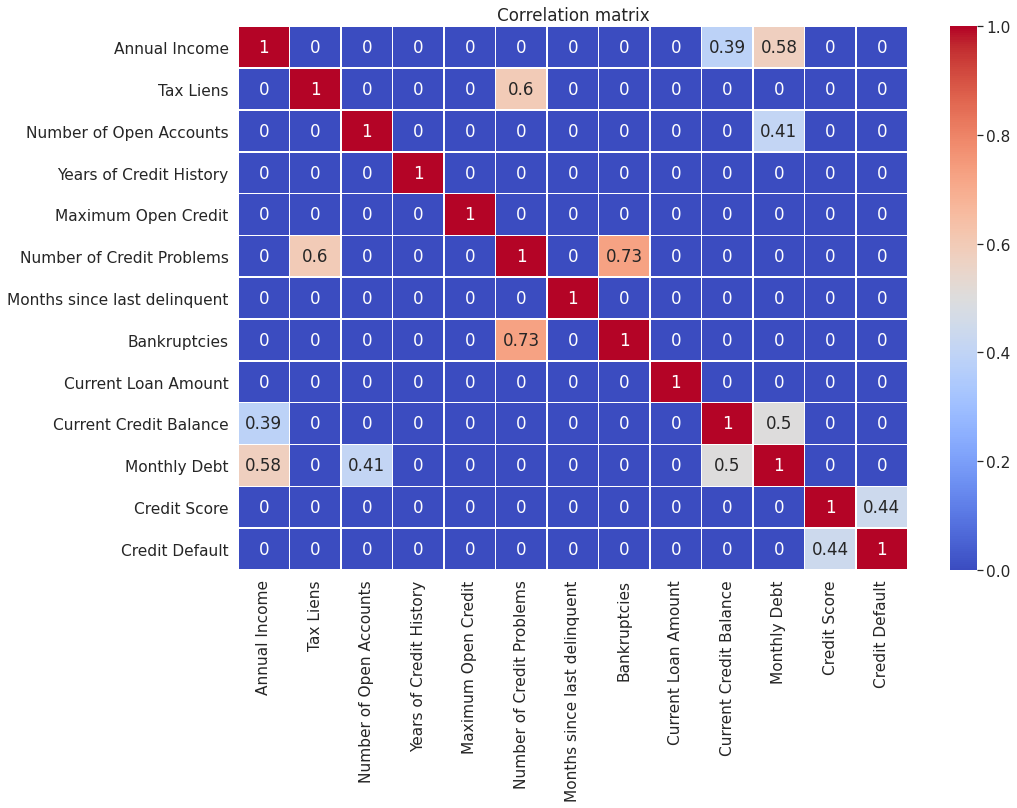

In [10]:
# матрица коореляций
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr() # вызов корреляции
corr_matrix = np.round(corr_matrix, 2) # сколько знаки после запятой
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # все что меньше 0,3 по модулю равно 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # строим матрицу корреляций

plt.title('Correlation matrix')
plt.show()

**Из матрицы видно что Bunkruptcies и Number of credit problem очень сильно зависят друг от друга**

# 4.Замена всех категориальных и словесных признаков на числовые

In [11]:
a = []
for col in df_train.columns:
  if len(df_train[col].unique()) < 15:
    a.append(col)
print(a)

['Home Ownership', 'Years in current job', 'Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Term', 'Credit Default']


In [12]:
df_train.select_dtypes(include = ['object']).columns

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

**Всего у нас получилось 7 категриальных признаков, но Credit Default мы не будем трогать так как это целевая переменная, но у нас так же есть столбец Purpose который является строковым**

##Bankruptcies - банкротство

**Если взять в пример колонку Bankruptcies то тут видно что человек либо не платил несколько раз либо платил все, в качестве уменьшения уникальных значений можно заменить значения 2,3,4 на 1 так как человек все равно не выплатил кредит а значений 2,3,4 достаточно мало**

In [13]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [14]:
df_train['Bankruptcies_new'] = df_train['Bankruptcies']
df_train.loc[df_train['Bankruptcies_new'] > 1, 'Bankruptcies_new'] = 1
df_train['Bankruptcies_new'].value_counts()

0.0    6660
1.0     826
Name: Bankruptcies_new, dtype: int64

##Home Ownership - домовладелец

**Что касается Home Ownership, то тут можно объединить home mortgage и have mortgage в одно**

In [15]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [16]:
df_train['Home_Ownership_new'] = df_train['Home Ownership'].replace(['Home Mortgage', 'Rent', 'Own Home', 'Have Mortgage'], [0,1,2,0])
df_train['Home_Ownership_new'].value_counts()

0    3649
1    3204
2     647
Name: Home_Ownership_new, dtype: int64

## Tax Liens - налоговые обременения

**Tax Liens можно разделить на 0 и 1, следовательно все что выше 1 превращается в 1**

In [17]:
df_train['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [18]:
df_train['Tax_Liens_new'] = df_train['Tax Liens']
df_train.loc[df_train['Tax_Liens_new'] > 1, 'Tax_Liens_new'] = 1
df_train['Tax_Liens_new'].value_counts()

0.0    7366
1.0     134
Name: Tax_Liens_new, dtype: int64

## Number of Credit Problems - количество проблем с кредитом

**Number of Credit Problems можно разделить на 2 значения 0 и 1, следователньо все что выше 1 равно 1**

In [19]:
df_train['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [20]:
df_train['Number_of_Credit_Problems_new'] = df_train['Number of Credit Problems']
df_train.loc[df_train['Number_of_Credit_Problems_new'] > 1, 'Number_of_Credit_Problems_new'] = 1
df_train['Number_of_Credit_Problems_new'].value_counts()

0.0    6469
1.0    1031
Name: Number_of_Credit_Problems_new, dtype: int64

## Term - срок кредита

**В Term можно поменять Short Term на 0 и Long Term на 1**

In [21]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [22]:
df_train['Term_new'] = df_train['Term'].replace(['Short Term', 'Long Term'], [0,1])
df_train['Term_new'].value_counts()

0    5556
1    1944
Name: Term_new, dtype: int64

## Years in current job - количество лет на текущем месте работы

**В Years in current job надо поменять словесные значений на такие же только числовые, только за место < 1 year поменять на 0**

In [23]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [24]:
df_train['Years_in_current_job_new'] = df_train['Years in current job'].replace(
    ['10+ years', '2 years', '3 years', '< 1 year', '5 years', '1 year', '4 years', '6 years', '7 years', '8 years', '9 years'],
    [10,2,3,0,5,1,4,6,7,8,9] )
df_train['Years_in_current_job_new'].value_counts()

10.0    2332
2.0      705
3.0      620
0.0      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: Years_in_current_job_new, dtype: int64

## Purpose - цель кредита

In [25]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [26]:
data = {
            'debt consolidation': 2,
            'other': 0, 
            'home improvements': 1,
            'take a trip': 1, 
            'buy a car': 1,
            'small business': 2,
            'business loan': 2,
            'wedding': 1,
            'educational expenses': 1,
            'buy house': 2,
            'medical bills': 1,
            'moving': 1,
            'major purchase': 2,
            'vacation':1,
            'renewable energy':1    
          }

df_train['Purpose_new'] = df_train['Purpose'].map(data)
df_train['Purpose_new'].value_counts()

2    6173
0     665
1     662
Name: Purpose_new, dtype: int64

# 5.Результаты замены категориальных и словесных признаков в числовой

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Home Ownership                 7500 non-null   object 
 1   Annual Income                  5943 non-null   float64
 2   Years in current job           7129 non-null   object 
 3   Tax Liens                      7500 non-null   float64
 4   Number of Open Accounts        7500 non-null   float64
 5   Years of Credit History        7500 non-null   float64
 6   Maximum Open Credit            7500 non-null   float64
 7   Number of Credit Problems      7500 non-null   float64
 8   Months since last delinquent   3419 non-null   float64
 9   Bankruptcies                   7486 non-null   float64
 10  Purpose                        7500 non-null   object 
 11  Term                           7500 non-null   object 
 12  Current Loan Amount            7500 non-null   f

# 6.Обработка пропусков

In [28]:
df_train_pass = df_train[{'Home_Ownership_new', 'Annual Income', 'Years_in_current_job_new', 'Tax_Liens_new', 'Number of Open Accounts',
                        'Years of Credit History', 'Maximum Open Credit', 'Number_of_Credit_Problems_new', 'Months since last delinquent',
                        'Bankruptcies_new', 'Purpose_new', 'Term_new', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 
                        'Credit Score', 'Credit Default'}]
df_train_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Purpose_new                    7500 non-null   int64  
 1   Term_new                       7500 non-null   int64  
 2   Bankruptcies_new               7486 non-null   float64
 3   Maximum Open Credit            7500 non-null   float64
 4   Number_of_Credit_Problems_new  7500 non-null   float64
 5   Monthly Debt                   7500 non-null   float64
 6   Months since last delinquent   3419 non-null   float64
 7   Tax_Liens_new                  7500 non-null   float64
 8   Credit Score                   5943 non-null   float64
 9   Home_Ownership_new             7500 non-null   int64  
 10  Annual Income                  5943 non-null   float64
 11  Number of Open Accounts        7500 non-null   float64
 12  Years_in_current_job_new       7129 non-null   f

**У нас пропуски в признаках: Months since last delinquent, Years_in_current_job_new, Bankruptcies_new, Annual Income и Credit Score**

## Months since last delinquent - количество месяцев с последней просрочки платежа

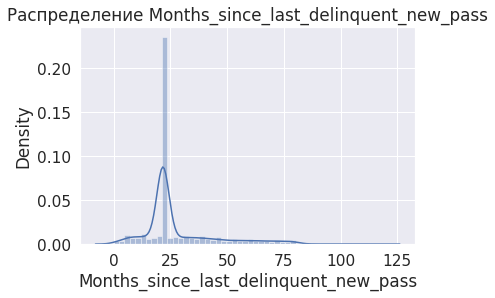

count    7500.000000
mean       27.616802
std        16.011196
min         0.000000
25%        21.688806
50%        21.688806
75%        29.000000
max       118.000000
Name: Months_since_last_delinquent_new_pass, dtype: float64

In [29]:
df_train_pass['Months_since_last_delinquent_new_pass'] = df_train_pass['Months since last delinquent']
df_train_pass.loc[df_train_pass['Months_since_last_delinquent_new_pass'].isna(), 'Months_since_last_delinquent_new_pass'] = df_train_pass['Months_since_last_delinquent_new_pass'].std()

sns.distplot(df_train_pass['Months_since_last_delinquent_new_pass'])
plt.title('Распределение Months_since_last_delinquent_new_pass')
plt.show()

df_train_pass['Months_since_last_delinquent_new_pass'].describe()

## Years_in_current_job_new

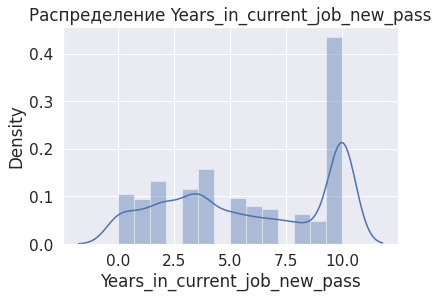

count    7500.000000
mean        5.768541
std         3.563280
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        10.000000
Name: Years_in_current_job_new_pass, dtype: float64

In [30]:
df_train_pass['Years_in_current_job_new_pass'] = df_train_pass['Years_in_current_job_new']
df_train_pass.loc[df_train_pass['Years_in_current_job_new_pass'].isna(), 'Years_in_current_job_new_pass'] = df_train_pass['Years_in_current_job_new_pass'].std()

sns.distplot(df_train_pass['Years_in_current_job_new_pass'])
plt.title('Распределение Years_in_current_job_new_pass')
plt.show()

df_train_pass['Years_in_current_job_new_pass'].describe()

## Bankruptcies_new

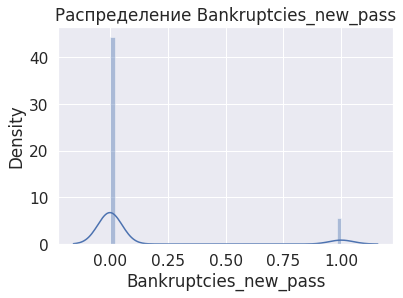

count    7500.000000
mean        0.110339
std         0.313041
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankruptcies_new_pass, dtype: float64

In [31]:
df_train_pass['Bankruptcies_new_pass'] = df_train_pass['Bankruptcies_new']
df_train_pass.loc[df_train_pass['Bankruptcies_new_pass'].isna(), 'Bankruptcies_new_pass'] = df_train_pass['Bankruptcies_new_pass'].mean()

sns.distplot(df_train_pass['Bankruptcies_new_pass'])
plt.title('Распределение Bankruptcies_new_pass')
plt.show()

df_train_pass['Bankruptcies_new_pass'].describe()

## Annual Income - годовой доход

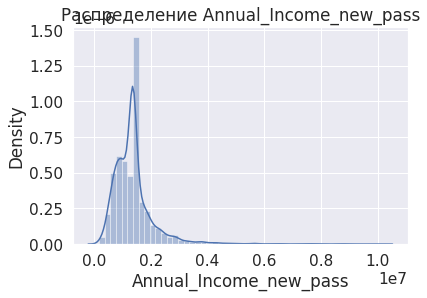

count    7.500000e+03
mean     1.366392e+06
std      7.524812e+05
min      1.645970e+05
25%      9.311330e+05
50%      1.366392e+06
75%      1.499974e+06
max      1.014934e+07
Name: Annual_Income_new_pass, dtype: float64

In [32]:
df_train_pass['Annual_Income_new_pass'] = df_train_pass['Annual Income']
df_train_pass.loc[df_train_pass['Annual_Income_new_pass'].isna(), 'Annual_Income_new_pass'] = df_train_pass['Annual_Income_new_pass'].mean()

sns.distplot(df_train_pass['Annual_Income_new_pass'])
plt.title('Распределение Annual_Income_new_pass')
plt.show()

df_train_pass['Annual_Income_new_pass'].describe()

## Credit Score - баллы кредитного рейтинга

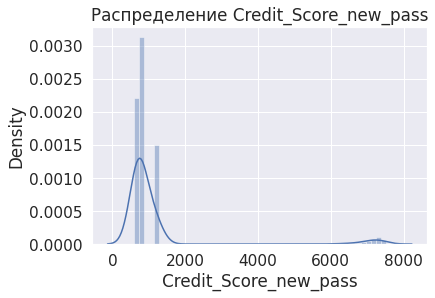

count    7500.000000
mean     1151.087498
std      1428.207201
min       585.000000
25%       718.000000
50%       738.000000
75%      1151.087498
max      7510.000000
Name: Credit_Score_new_pass, dtype: float64

In [33]:
df_train_pass['Credit_Score_new_pass'] = df_train_pass['Credit Score']
df_train_pass.loc[df_train_pass['Credit_Score_new_pass'].isna(), 'Credit_Score_new_pass'] = df_train_pass['Credit_Score_new_pass'].mean()

sns.distplot(df_train_pass['Credit_Score_new_pass'])
plt.title('Распределение Credit_Score_new_pass')
plt.show()

df_train_pass['Credit_Score_new_pass'].describe()

In [34]:
df_train_pass.columns

Index(['Purpose_new', 'Term_new', 'Bankruptcies_new', 'Maximum Open Credit',
       'Number_of_Credit_Problems_new', 'Monthly Debt',
       'Months since last delinquent', 'Tax_Liens_new', 'Credit Score',
       'Home_Ownership_new', 'Annual Income', 'Number of Open Accounts',
       'Years_in_current_job_new', 'Current Credit Balance',
       'Years of Credit History', 'Credit Default', 'Current Loan Amount',
       'Months_since_last_delinquent_new_pass',
       'Years_in_current_job_new_pass', 'Bankruptcies_new_pass',
       'Annual_Income_new_pass', 'Credit_Score_new_pass'],
      dtype='object')

# 7.Обучение на train

In [35]:
X = df_train_pass[{'Years of Credit History', 'Home_Ownership_new', 'Purpose_new', 'Current Loan Amount', 'Monthly Debt',
       'Current Credit Balance', 'Term_new',
       'Number of Open Accounts', 'Tax_Liens_new',
       'Maximum Open Credit',
       'Number_of_Credit_Problems_new',
       'Months_since_last_delinquent_new_pass',
       'Years_in_current_job_new_pass', 'Bankruptcies_new_pass',
       'Annual_Income_new_pass', 'Credit_Score_new_pass'}]
Y = df_train_pass['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True, random_state=21, stratify=Y)

## Нужные функции

In [36]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

In [37]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [38]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

## Балансировка целевой переменной

In [39]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default', method='over')
    
df_balanced['Credit Default'].value_counts()

0    3609
1    2832
Name: Credit Default, dtype: int64

In [40]:
X_train = df_balanced.drop(columns='Credit Default')
y_train = df_balanced['Credit Default']

# Построение и оценка моделей

Логистическая регрессия

In [41]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      3609
           1       0.62      0.53      0.57      2832

    accuracy                           0.65      6441
   macro avg       0.65      0.64      0.64      6441
weighted avg       0.65      0.65      0.65      6441

TEST

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1778
           1       0.45      0.53      0.48       697

    accuracy                           0.68      2475
   macro avg       0.62      0.64      0.63      2475
weighted avg       0.70      0.68      0.69      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1325  453
1                329  368


k ближайших соседей

In [42]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

evaluate_preds(model_knn, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      3609
           1       0.75      0.71      0.73      2832

    accuracy                           0.77      6441
   macro avg       0.76      0.76      0.76      6441
weighted avg       0.77      0.77      0.77      6441

TEST

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1778
           1       0.34      0.40      0.37       697

    accuracy                           0.61      2475
   macro avg       0.55      0.55      0.55      2475
weighted avg       0.63      0.61      0.62      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1241  537
1                416  281


Бустинговые алгоритмы

XGBoost

In [43]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3609
           1       0.78      0.58      0.66      2832

    accuracy                           0.74      6441
   macro avg       0.75      0.72      0.73      6441
weighted avg       0.75      0.74      0.73      6441

TEST

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1778
           1       0.54      0.49      0.52       697

    accuracy                           0.74      2475
   macro avg       0.68      0.67      0.67      2475
weighted avg       0.73      0.74      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1487  291
1                352  345


LightGBM

In [44]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3609
           1       0.96      0.91      0.93      2832

    accuracy                           0.94      6441
   macro avg       0.95      0.94      0.94      6441
weighted avg       0.94      0.94      0.94      6441

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1778
           1       0.52      0.45      0.48       697

    accuracy                           0.73      2475
   macro avg       0.66      0.64      0.65      2475
weighted avg       0.72      0.73      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1482  296
1                382  315


CatBoost

In [45]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3609
           1       0.94      0.87      0.90      2832

    accuracy                           0.92      6441
   macro avg       0.92      0.91      0.92      6441
weighted avg       0.92      0.92      0.92      6441

TEST

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1778
           1       0.54      0.45      0.49       697

    accuracy                           0.74      2475
   macro avg       0.67      0.65      0.65      2475
weighted avg       0.72      0.74      0.73      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1510  268
1                386  311


# Выбор лучшей модели и подбор гиперпараметров


In [46]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

In [47]:
params = {'n_estimators':[50, 100, 200, 500], 
          'max_depth':[3, 5, 7, 10],
          'learning_rate':[0.001, 0.01, 0.05, 0.1]}

In [48]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [49]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 664 ms, total: 25.2 s
Wall time: 2min 39s


In [50]:
rs.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500}

In [51]:
rs.best_score_

0.8110204729568643

В ходе работы мой выбор пал на два метода обучения: CatBoostClassifier и XGBClassifier следовательно и выбирать я буду из этих двух методов, но если судить по последним тестам, то CatBoostClassifier на мой взгляд проявит себя лучше